In [1]:
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K

In [2]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator( 
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06,
    brightness_range=None,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    vertical_flip=False,
    rescale=None,
    data_format=None,
    dtype=None,

    horizontal_flip=True,
    shear_range=0.13,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.15,
    validation_split=0.25,
    zoom_range=0.1,
    preprocessing_function=None
)
train_ds = datagen.flow_from_directory(
    r'/content/drive/MyDrive/datasets/dataset_web',
    class_mode='categorical',
    target_size=(299, 299),
    shuffle=True,
    subset='training') 


val_ds = datagen.flow_from_directory(
    r'/content/drive/MyDrive/datasets/dataset_web', 
    target_size=(299, 299),
    shuffle=True,
    batch_size=32,
    class_mode='categorical',
    subset='validation')

NameError: name 'datagen' is not defined

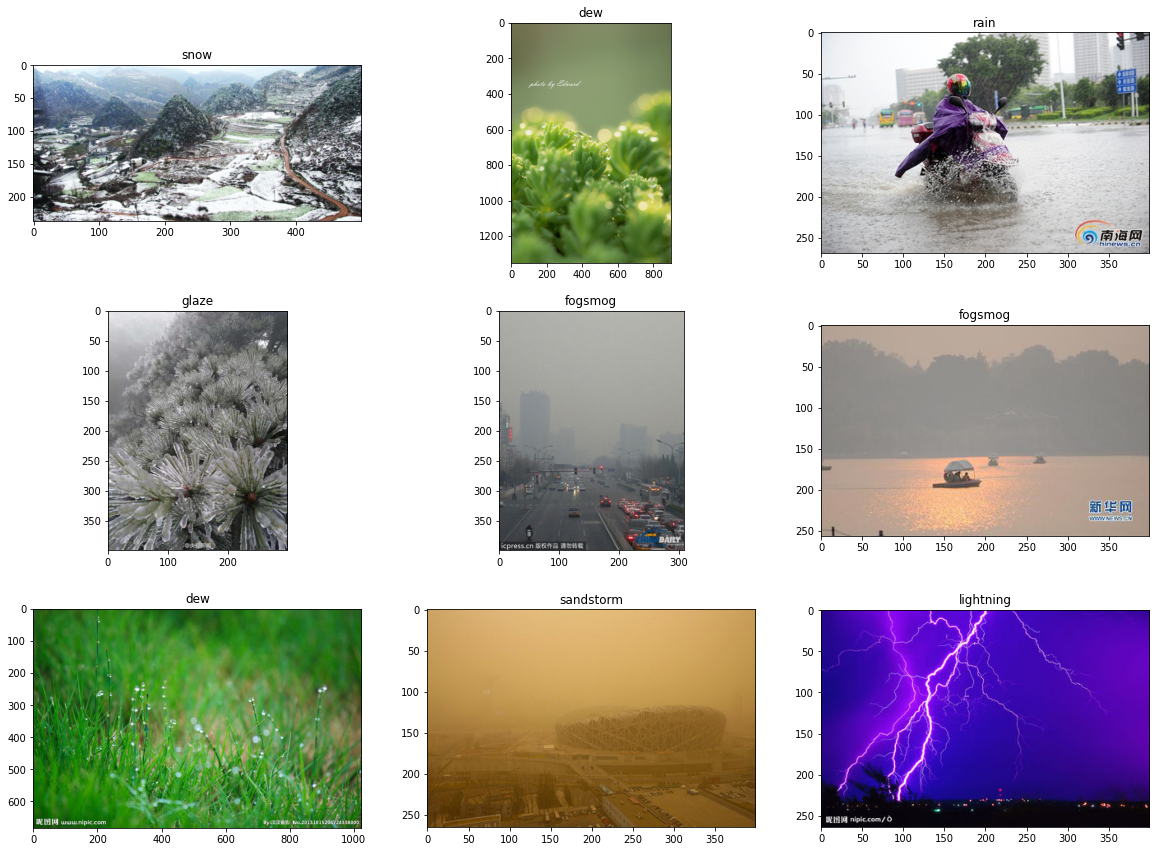

In [23]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [24]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [28]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
base_model =tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(299,299,3),
    classes=1000,
    classifier_activation="softmax",
)
base_model.trainable = False

In [31]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
)
model = Sequential([
    base_model,
    layers.Dense(299, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(154 , activation='relu'),
    layers.Dense(11, activation = 'softmax')
])

model.compile(optimizer=adam_optimizer,
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 dense_16 (Dense)            (None, 299)               299299    
                                                                 
 dropout_10 (Dropout)        (None, 299)               0         
                                                                 
 dense_17 (Dense)            (None, 154)               46200     
                                                                 
 dense_18 (Dense)            (None, 11)                1705      
                                                                 
Total params: 23,257,684
Trainable params: 347,204
Non-trainable params: 22,910,480
_________________________________________________________________


In [32]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                             patience=2)])
results = model.evaluate(val_ds)


  2/145 [..............................] - ETA: 34:24 - loss: 2.3942 - accuracy: 0.0781      

KeyboardInterrupt: ignored

In [ ]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.50801
Test Accuracy: 84.12%


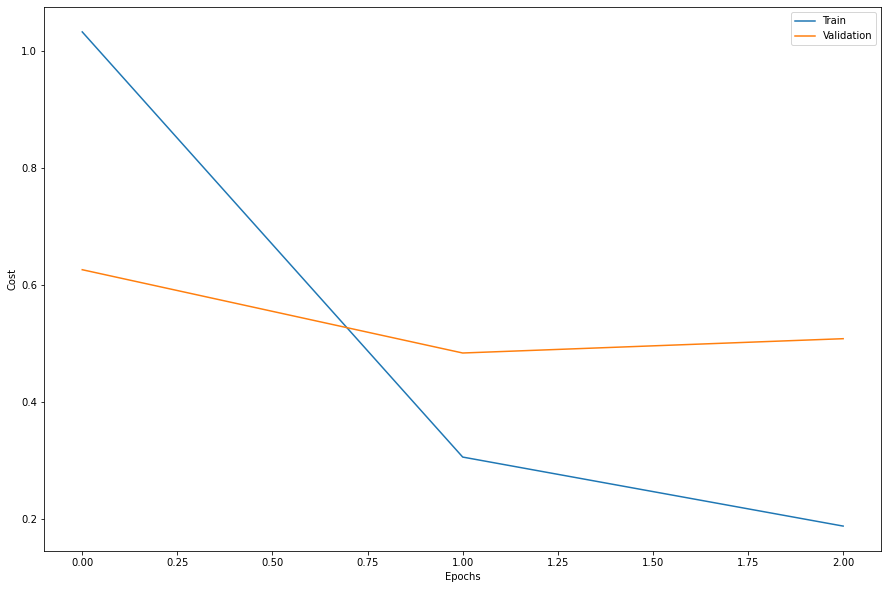

In [ ]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')